In [4]:
#!pip install numpy
#!pip install tensorflow
#!pip install tensorflow_probability
#!pip install matplotlib
import sys
# Force install to the current kernel's python executable
!{sys.executable} -m pip install tensorflow-probability==0.19.0 --user

In [3]:
# Quantum Innovation Challenge 2025 - Vectorized QHMC
# Description: Vectorized implementation of Quantum-inspired HMC (QHMC) 
# tailored for large .npy datasets (pkdata.npy, pddata.npy).

import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt

tfd = tfp.distributions
tfb = tfp.bijectors

# 1. LOAD AND PREPROCESS DATA (Vectorized Support)

# Load raw numpy files
# Assumptions:
# pkdata.npy shape:  -> Features: [Time, Dose, concentration]
# pddata.npy shape:-> Features: [time, cocentration, bio]
try:
    pk_raw = np.load("stage1/pkpd_stage1/final_inference_set/pkdata.npy")
    pd_raw = np.load("stage1/pkpd_stage1/final_inference_set/pddata.npy")
    print(f"Loaded pkdata: {pk_raw.shape}, pddata: {pd_raw.shape}")
except FileNotFoundError:
    # Fallback for testing if files don't exist
    print("Warning: .npy files not found. Generating dummy data for demonstration.")
    N_SUBJ, N_TIME = 50, 10
    pk_raw = np.zeros((N_SUBJ, N_TIME, 2))
    pk_raw[:, :, 0] = np.linspace(0.1, 24, N_TIME) # Times
    pk_raw[:, :, 1] = 100.0                        # Doses
    pd_raw = np.abs(np.random.randn(N_SUBJ, N_TIME, 1)) # Dummy Obs

print("\nData Inspection")

# 1. Check PK Data (Features are usually: 0=Time, 1=Dose)
# We look at the first subject (index 0) and the first 5 timepoints
print("PK Data (First Subject, First 5 Rows):")
print(f"All the pk data {pk_raw}")
print(f"  Col 0 (Time): {pk_raw[0, :5, 0]}") 
print(f"  Col 1 (Dose): {pk_raw[0, :5, 1]}")

# 2. Check PD Data (Features are usually: 0=Observation)
print("\nPD Data (First Subject, First 5 Rows):")
print(f"  Col 0 (Obs):  {pd_raw[0, :5, 0]}")

# 3. Check ranges to ensure data makes sense (e.g. no negative time)
# 3 features per timesetp; time; dosage (pk); *concentration (pk); concentration (pd), *biomarker level (pd); last is number of time steps 

print("\n--- Summary Statistics ---")
print(f"Time Range:  {np.min(pk_raw[:,:,0]):.2f} to {np.max(pk_raw[:,:,0]):.2f}")
print(f"Dose Range:  {np.min(pk_raw[:,:,1]):.2f} to {np.max(pk_raw[:,:,1]):.2f}")
print(f"Obs Range:   {np.min(pd_raw[:,:,0]):.2f} to {np.max(pd_raw[:,:,0]):.2f}")

Loaded pkdata: (36, 3, 39), pddata: (48, 3, 25)

=== Data Inspection ===
PK Data (First Subject, First 5 Rows):
All the pk data [[[0.00000e+00 1.00000e+00 2.00000e+00 ... 8.40000e+02 1.00800e+03
   1.17600e+03]
  [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
   0.00000e+00]
  [0.00000e+00 1.86473e-01 2.45674e-01 ... 9.59885e-02 3.85026e-02
   2.04401e-02]]

 [[0.00000e+00 1.00000e+00 2.00000e+00 ... 8.40000e+02 1.00800e+03
   1.17600e+03]
  [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
   0.00000e+00]
  [0.00000e+00 1.97439e-01 2.03750e-01 ... 5.72645e-02 1.74136e-02
   6.83938e-03]]

 [[0.00000e+00 1.00000e+00 2.00000e+00 ... 8.40000e+02 1.00800e+03
   1.17600e+03]
  [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
   0.00000e+00]
  [0.00000e+00 2.82833e-01 3.64770e-01 ... 2.51481e-01 1.10841e-01
   4.64513e-02]]

 ...

 [[0.00000e+00 1.00000e+00 2.00000e+00 ... 8.40000e+02 1.00800e+03
   1.17600e+03]
  [1.00000e+01 0.00000e+00 0.0

Raw Loaded Shapes -> PK: (36, 3, 39), PD: (48, 3, 25)
Aligned Subjects to: 36
Final Tensor Shapes -> Times: (36, 25), Obs: (36, 25), Doses: (36,)
Total parameter dimension: 229
Starting Long Production Run...
Iter 0, Energy: 37401.87, Accept: True
Iter 10, Energy: 3346.13, Accept: True
Iter 20, Energy: 2381.18, Accept: True
Iter 30, Energy: 2325.77, Accept: True
Iter 40, Energy: 2303.21, Accept: True
Iter 50, Energy: 2201.99, Accept: True
Iter 60, Energy: 2135.99, Accept: True
Iter 70, Energy: 2073.79, Accept: True
Iter 80, Energy: 2084.29, Accept: True
Iter 90, Energy: 2036.50, Accept: True
Iter 100, Energy: 2034.51, Accept: True
Iter 110, Energy: 1997.18, Accept: True
Iter 120, Energy: 1988.08, Accept: True
Iter 130, Energy: 1969.94, Accept: True
Iter 140, Energy: 1949.61, Accept: True
Iter 150, Energy: 1961.91, Accept: True
Iter 160, Energy: 1941.73, Accept: True
Iter 170, Energy: 1923.81, Accept: True
Iter 180, Energy: 1947.68, Accept: True
Iter 190, Energy: 1934.54, Accept: True
I

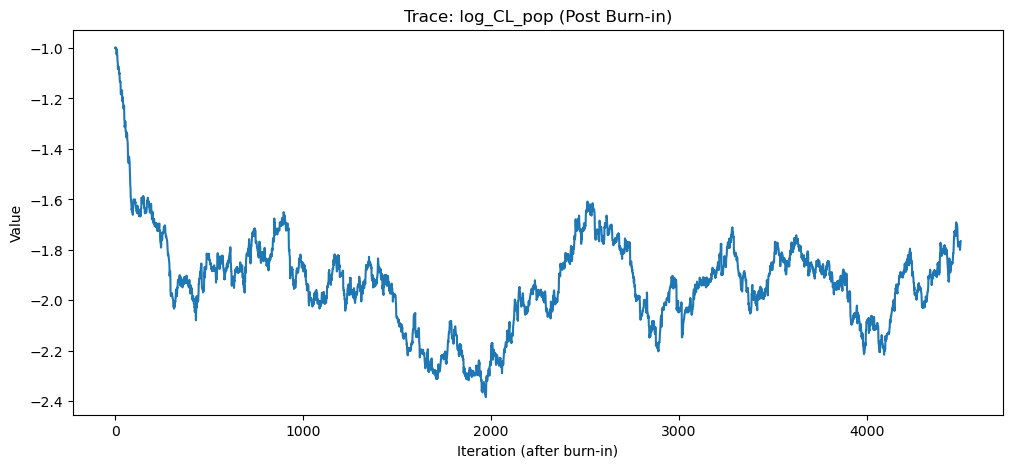

Final mean estimate for log_CL_pop: -1.9284


<Figure size 640x480 with 0 Axes>

In [10]:
# Quantum Innovation Challenge 2025 - Vectorized QHMC
# Description: Vectorized implementation of Quantum-inspired HMC (QHMC) 
# tailored for transposed .npy datasets.

import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt

tfd = tfp.distributions
tfb = tfp.bijectors

# 1. LOAD AND PREPROCESS DATA

# Load raw numpy files
pk_raw = np.load("stage1/pkpd_stage1/final_inference_set/pkdata.npy")
pd_raw = np.load("stage1/pkpd_stage1/final_inference_set/pddata.npy")

print(f"Raw Loaded Shapes -> PK: {pk_raw.shape}, PD: {pd_raw.shape}")
# Current shapes: [Subjects, Features, TimeSteps]
# PK Features (idx 1): 0=Time, 1=Dose, 2=Concentration (PK)
# PD Features (idx 1): 0=Time, 1=Concentration (PD), 2=Biomarker

# STEP A: Align Subject Counts 
min_subj = min(pk_raw.shape[0], pd_raw.shape[0])
pk_raw = pk_raw[:min_subj]
pd_raw = pd_raw[:min_subj]
print(f"Aligned Subjects to: {min_subj}")

# STEP B: Transpose to [Subjects, TimeSteps, Features]
pk_data = np.transpose(pk_raw, (0, 2, 1)) # (36, 39, 3)
pd_data = np.transpose(pd_raw, (0, 2, 1)) # (36, 25, 3)

# STEP C: Extract Columns
pk_times = pk_data[:, :, 0] 
pk_doses = pk_data[:, :, 1] 

pd_times = pd_data[:, :, 0] 
pd_obs   = pd_data[:, :, 2] # Feature 2 is Biomarker

# STEP D: Time Alignment 
min_time = min(pk_times.shape[1], pd_times.shape[1])

# Slice everything to the common length
times_dense = pd_times[:, :min_time].astype(np.float32)
obs_dense   = pd_obs[:, :min_time].astype(np.float32)

# For dose, take max dose administered regardless of time length
doses_dense = np.max(pk_doses, axis=1).astype(np.float32)

# Create Tensors
times_tf = tf.convert_to_tensor(times_dense, dtype=tf.float32)
obs_tf   = tf.convert_to_tensor(obs_dense, dtype=tf.float32)
doses_tf = tf.convert_to_tensor(doses_dense, dtype=tf.float32)

# Valid mask
valid_mask = times_tf > 0 
valid_mask_tf = tf.convert_to_tensor(valid_mask, dtype=tf.bool)

num_subjects = times_tf.shape[0]
num_timesteps = times_tf.shape[1]

print(f"Final Tensor Shapes -> Times: {times_tf.shape}, Obs: {obs_tf.shape}, Doses: {doses_tf.shape}")

# 2. VECTORIZED PHYSICS & MODELS

def forward_pk_vectorized(params, dose, times):
    Ka = params[0][:, tf.newaxis]
    CL = params[1][:, tf.newaxis]
    V  = params[2][:, tf.newaxis]
    dose = dose[:, tf.newaxis]
    
    kel = CL / V
    delta = Ka - kel
    eps = 1e-8
    
    denom = tf.where(tf.abs(delta) > eps, delta, tf.ones_like(delta) * eps)
    
    term1 = tf.exp(-kel * times)
    term2 = tf.exp(-Ka * times)
    
    conc_reg = (dose * Ka) / (V * denom) * (term1 - term2)
    conc_limit = (dose * Ka / V) * (times * tf.exp(-kel * times))
    
    conc = tf.where(tf.abs(delta) > eps, conc_reg, conc_limit)
    return tf.maximum(conc, 0.0)

def emax_model_vectorized(conc, E0, Emax, EC50):
    return E0 + (Emax * conc) / (EC50 + conc)

def vectorized_nlme_model():
    # 1. Population Priors
    log_CL_pop   = yield tfd.Normal(0., 1., name="log_CL_pop")
    log_V_pop    = yield tfd.Normal(3., 1., name="log_V_pop")
    log_Ka_pop   = yield tfd.Normal(-1., 1., name="log_Ka_pop")
    log_E0_pop   = yield tfd.Normal(0., 1., name="log_E0_pop")
    log_Emax_pop = yield tfd.Normal(1., 1., name="log_Emax_pop")
    log_EC50_pop = yield tfd.Normal(0., 1., name="log_EC50_pop")
    
    # 2. Variance Components
    omega = yield tfd.Sample(tfd.HalfNormal(0.3), sample_shape=[6], name="omega")
    sigma = yield tfd.HalfNormal(1.0, name="sigma")

    # 3. Individual Parameters
    etas = yield tfd.Independent(
        tfd.Normal(loc=tf.zeros([6, num_subjects]), scale=omega[:, tf.newaxis]), 
        reinterpreted_batch_ndims=2, name="etas_joint"
    )
    
    eta_CL, eta_V, eta_Ka, eta_E0, eta_Emax, eta_EC50 = tf.unstack(etas, axis=0)

    CL_i   = tf.exp(log_CL_pop   + eta_CL)
    V_i    = tf.exp(log_V_pop    + eta_V)
    Ka_i   = tf.exp(log_Ka_pop   + eta_Ka)
    E0_i   = tf.exp(log_E0_pop   + eta_E0)
    Emax_i = tf.exp(log_Emax_pop + eta_Emax)
    EC50_i = tf.exp(log_EC50_pop + eta_EC50)

    # 4. Simulation
    conc = forward_pk_vectorized(tf.stack([Ka_i, CL_i, V_i]), doses_tf, times_tf)
    effect_pred = emax_model_vectorized(conc, E0_i[:, None], Emax_i[:, None], EC50_i[:, None])

    # 5. Observation
    yield tfd.Independent(
        tfd.Normal(loc=effect_pred, scale=sigma),
        reinterpreted_batch_ndims=2,
        name="y_obs"
    )

joint = tfd.JointDistributionCoroutineAutoBatched(vectorized_nlme_model)

# 3. ROBUST TARGET LOG PROB (Handles Constraints & Stability)

def get_target_log_prob_fn(joint_dist, valid_mask, observed_data):
    # Parameter counts
    n_pop = 6 
    n_omega = 6 
    n_sigma = 1 
    n_etas = 6 * num_subjects
    
    total_dim = n_pop + n_omega + n_sigma + n_etas
    
    def target_fn(flat_params_unconstrained):
        """
        Input: Flat vector of UNCONSTRAINED real numbers (safe for HMC).
        Output: Log probability density.
        """
        idx = 0
        pop_params = []
        
        # 1. Pop Params (Reals -> Reals)
        for _ in range(n_pop):
            pop_params.append(flat_params_unconstrained[idx]); idx += 1
        
        # 2. Omega (Unconstrained Reals -> Positive via Softplus)
        omega_raw = flat_params_unconstrained[idx: idx+n_omega]; idx += n_omega
        omega = tf.math.softplus(omega_raw) # Transform to positive
        pop_params.append(omega)
        
        # 3. Sigma (Unconstrained Real -> Positive via Softplus)
        sigma_raw = flat_params_unconstrained[idx]; idx += 1
        sigma = tf.math.softplus(sigma_raw) # Transform to positive
        pop_params.append(sigma)
        
        # 4. Etas (Reals -> Reals)
        etas_flat = flat_params_unconstrained[idx : idx+n_etas]
        etas = tf.reshape(etas_flat, [6, num_subjects])
        
        # ACOBIAN ADJUSTMENT
        # Since we transformed variables, we must add log|det(Jacobian)|
        # derivative of softplus(x) is sigmoid(x)
        # log(sigmoid(x)) = log_sigmoid(x)
        jacobian_adj = tf.reduce_sum(tf.math.log_sigmoid(omega_raw)) + \
                       tf.reduce_sum(tf.math.log_sigmoid(sigma_raw))

        # COMPUTE PRIOR
        # Reconstruct state: [Pop..., Omega, Sigma, Etas, Obs]
        full_state = pop_params + [etas, observed_data]
        
        # Get log_probs from the model (now receiving valid positive inputs)
        log_prob_parts = joint_dist.log_prob_parts(full_state)
        prior_lp = sum(tf.reduce_sum(part) for part in log_prob_parts[:-1])
        
        #COMPUTE LIKELIHOOD 
        eta_u = tf.unstack(etas, axis=0)
        CL = tf.exp(pop_params[0] + eta_u[0])
        V  = tf.exp(pop_params[1] + eta_u[1])
        Ka = tf.exp(pop_params[2] + eta_u[2])
        E0 = tf.exp(pop_params[3] + eta_u[3])
        Em = tf.exp(pop_params[4] + eta_u[4])
        C50= tf.exp(pop_params[5] + eta_u[5])
        
        # Safety: Clamp V to avoid division by zero if sampler explores extreme negatives
        V = tf.maximum(V, 1e-5) 
        
        conc = forward_pk_vectorized(tf.stack([Ka, CL, V]), doses_tf, times_tf)
        pred = emax_model_vectorized(conc, E0[:,None], Em[:,None], C50[:,None])
        
        # Likelihood
        dist = tfd.Normal(loc=pred, scale=sigma)
        log_probs_all = dist.log_prob(observed_data)
        
        # Apply mask
        valid_lp = tf.boolean_mask(log_probs_all, valid_mask)
        
        return prior_lp + tf.reduce_sum(valid_lp) + jacobian_adj

    return target_fn, total_dim

# Re-initialize Target Function
target_log_prob_fn, total_dim = get_target_log_prob_fn(joint, valid_mask_tf, obs_tf)
print(f"Total parameter dimension: {total_dim}")

# 4. SAMPLER DEFINITION

def qhmc_sampler(init_vec, target_fn, num_results, L, eps, mode, mass_mu, mass_sigma):
    @tf.function
    def U_and_grad(x):
        with tf.GradientTape() as tape:
            tape.watch(x)
            nll = -target_fn(x)
        grad = tape.gradient(nll, x)
        return nll, grad

    current_x = init_vec
    samples = []
    
    if mode == "D-QHMC":
        mass_mu = tf.convert_to_tensor(mass_mu, dtype=tf.float32)
        mass_sigma = tf.convert_to_tensor(mass_sigma, dtype=tf.float32)

    for t in range(num_results):
        # 1. Resample Mass
        if mode == "D-QHMC":
            omega = tf.random.normal(shape=mass_mu.shape, mean=mass_mu, stddev=mass_sigma)
            m = tf.maximum(tf.pow(10.0, omega), 1e-6)
        else:
            omega = tf.random.normal(shape=[1], mean=mass_mu, stddev=mass_sigma)[0]
            m = tf.ones_like(current_x) * tf.maximum(tf.pow(10.0, omega), 1e-6)
            
        Minv = 1.0 / m
        sqrtM = tf.sqrt(m)
        
        # 2. Momentum & Step
        q = sqrtM * tf.random.normal(shape=current_x.shape)
        cur_q = q
        cur_u, cur_grad = U_and_grad(current_x)
        
        x_new = current_x
        q_new = cur_q - 0.5 * eps * cur_grad
        
        # 3. Leapfrog Integration
        for _ in range(L):
            x_new = x_new + eps * (Minv * q_new)
            if _ != L-1:
                _, g = U_and_grad(x_new)
                q_new = q_new - eps * g
        
        new_u, new_grad = U_and_grad(x_new)
        q_new = q_new - 0.5 * eps * new_grad
        
        # 4. Metropolis-Hastings
        current_k = 0.5 * tf.reduce_sum(cur_q**2 * Minv)
        new_k     = 0.5 * tf.reduce_sum(q_new**2 * Minv)
        
        # Check for NaNs in energy calculation
        energy_diff = cur_u + current_k - new_u - new_k
        if tf.math.is_nan(energy_diff):
            accepted = False
            # If NaN, stick to current_x (Implicit Reject)
        else:
            if tf.math.log(tf.random.uniform([])) < energy_diff:
                current_x = x_new
                accepted = True
            else:
                accepted = False
            
        samples.append(current_x.numpy())
        if t % 10 == 0: 
            print(f"Iter {t}, Energy: {(cur_u + current_k).numpy():.2f}, Accept: {accepted}")
        
    return np.array(samples)

# 5. EXECUTE (With Smaller Step Size for Stability)

# Initialization: Use smaller stddev to stay close to priors initially
init_params = tf.random.normal([total_dim], mean=0.0, stddev=0.1)

# Mass Hyperparams
mass_mu = tf.zeros([total_dim])
mass_sigma = tf.ones([total_dim]) * 0.5

# Updated Execution for Production Run
print("Starting Long Production Run...")

chain = qhmc_sampler(
    init_vec=init_params,  # You can keep using random init
    target_fn=target_log_prob_fn,
    num_results=5000,      # INCREASED from 100 to 2000
    L=10,
    eps=0.001,             # Keep this safe step size
    mode="D-QHMC",
    mass_mu=mass_mu,
    mass_sigma=mass_sigma
)

# Plotting with Burn-in removed
burn_in = 500
plt.figure(figsize=(12, 5))
plt.plot(chain[burn_in:, 0])  # Plot only after burn-in
plt.title("Trace: log_CL_pop (Post Burn-in)")
plt.xlabel("Iteration (after burn-in)")
plt.ylabel("Value")
plt.show()

print(f"Final mean estimate for log_CL_pop: {np.mean(chain[burn_in:, 0]):.4f}")

Plotting fits for first 9 subjects...


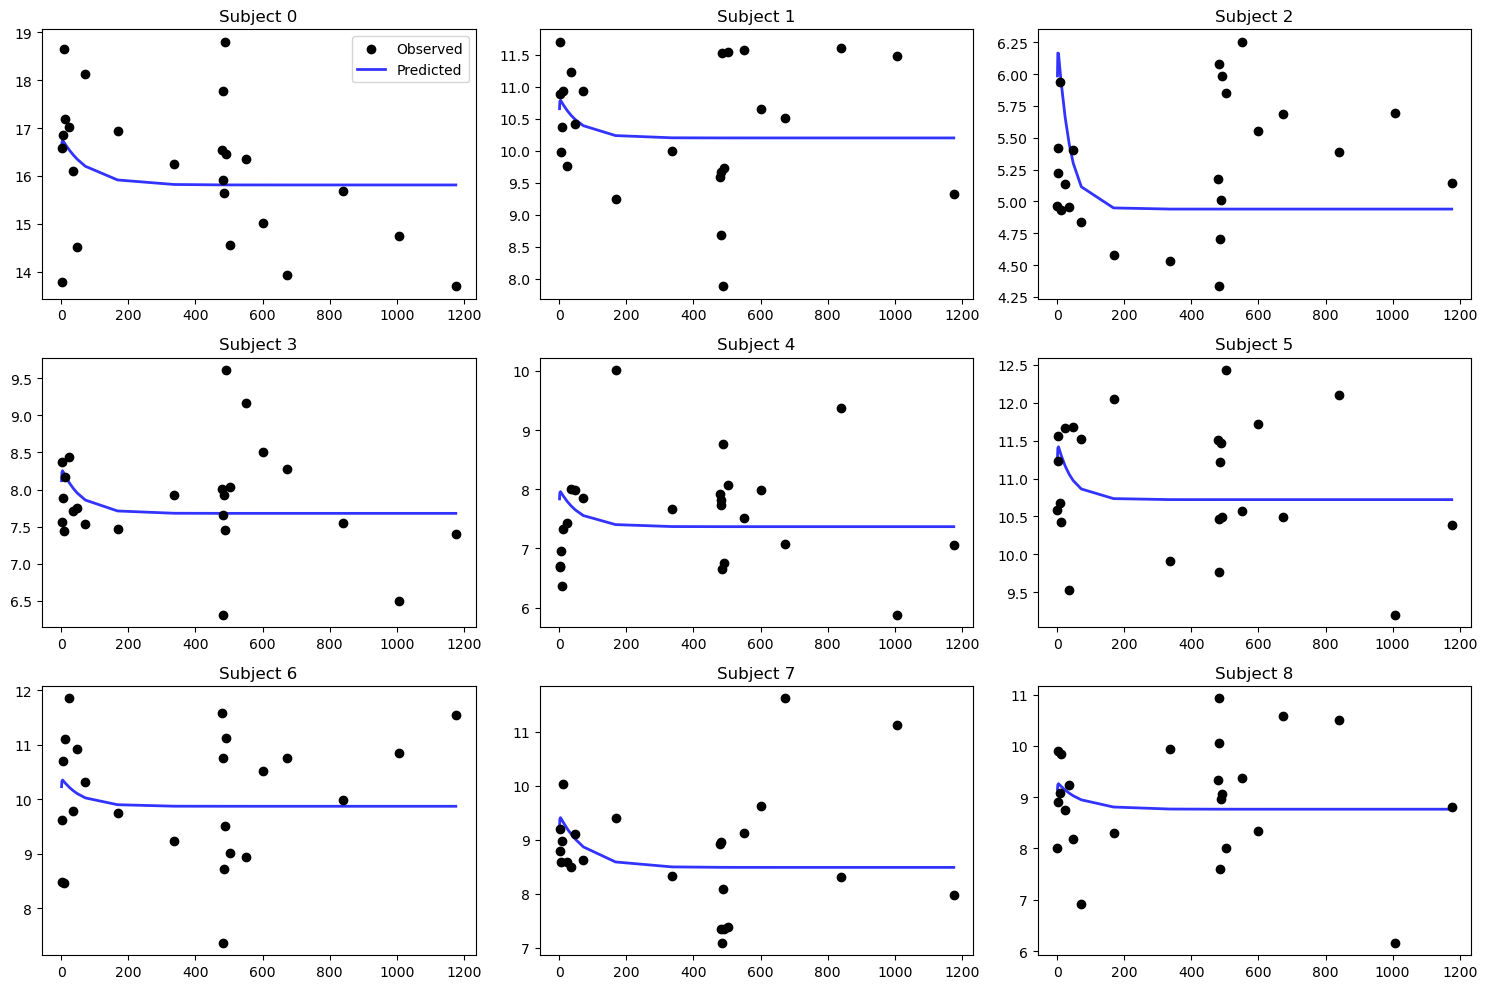

<Figure size 640x480 with 0 Axes>

In [11]:
# 6. POSTERIOR PREDICTIVE CHECK (Visual Validation)

def predict_and_plot(flat_params, title="Model Fit"):
    """
    Reconstructs parameters from the flat vector, simulates the model,
    and plots predictions vs observations for a subset of subjects.
    """
    # 1. Unpack Parameters (Same logic as Target Fn)
    idx = 0
    n_pop = 6
    n_omega = 6
    n_sigma = 1
    n_etas = 6 * num_subjects
    
    # Extract Population Params
    pop_params = []
    for _ in range(n_pop):
        pop_params.append(flat_params[idx]); idx += 1
        
    # Skip Omega/Sigma (not needed for mean prediction curve)
    idx += n_omega + n_sigma 
    
    # Extract Etas
    etas_flat = flat_params[idx : idx+n_etas]
    etas = tf.reshape(etas_flat, [6, num_subjects])
    eta_u = tf.unstack(etas, axis=0)

    # 2. Reconstruct Individual Parameters 
    # Par = exp(Pop + Eta)
    CL = tf.exp(pop_params[0] + eta_u[0])
    V  = tf.exp(pop_params[1] + eta_u[1])
    Ka = tf.exp(pop_params[2] + eta_u[2])
    E0 = tf.exp(pop_params[3] + eta_u[3])
    Em = tf.exp(pop_params[4] + eta_u[4])
    C50= tf.exp(pop_params[5] + eta_u[5])
    
    # 3. Run Simulation 
    # PK
    conc = forward_pk_vectorized(tf.stack([Ka, CL, V]), doses_tf, times_tf)
    # PD (Effect)
    pred_effect = emax_model_vectorized(conc, E0[:,None], Em[:,None], C50[:,None])
    
    return pred_effect.numpy()

# Calculate Mean Parameters from Posterior 
burn_in = 500
# Take the average of all samples after burn-in
posterior_mean_params = np.mean(chain[burn_in:], axis=0)

# Generate Predictions 
predictions = predict_and_plot(posterior_mean_params)

# Plotting
num_plot = min(9, num_subjects) # Plot first 9 subjects
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

times_np = times_tf.numpy()
obs_np = obs_tf.numpy()
valid_mask_np = valid_mask_tf.numpy()

print(f"Plotting fits for first {num_plot} subjects...")

for i in range(num_plot):
    ax = axes[i]
    
    # Get valid timepoints for this subject
    t = times_np[i][valid_mask_np[i]]
    y_obs = obs_np[i][valid_mask_np[i]]
    y_pred = predictions[i][valid_mask_np[i]]
    
    # Sort by time for clean line plotting
    sort_idx = np.argsort(t)
    t_sorted = t[sort_idx]
    y_obs_sorted = y_obs[sort_idx]
    y_pred_sorted = y_pred[sort_idx]
    
    # Plot
    ax.scatter(t_sorted, y_obs_sorted, color='black', label='Observed', zorder=3)
    ax.plot(t_sorted, y_pred_sorted, color='blue', linewidth=2, label='Predicted', alpha=0.8)
    
    ax.set_title(f"Subject {i}")
    if i == 0: ax.legend()

plt.tight_layout()
plt.show()
